In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')

In [7]:
df_kompas = pd.read_json('kompas.json', lines=True)
df_antarnews = pd.read_json('antara.json')

In [8]:
df_kompas.head()

,judul,kategori,tanggal,konten,penulis,gambar,link,sumber
0,"Man United ke Malaysia Pekan Ini, Laga Lawan A...",Bola,26/05/2025,KOMPAS.com - Manchester United akan berduel me...,Sem Bagaskara,https://asset.kompas.com/crops/y6boYMTAUOxnxTx...,https://bola.kompas.com/read/2025/05/26/080741...,https://www.kompas.com/
1,Kylian Mbappe Raih Sepatu Emas Eropa 2025 Usai...,Bola,26/05/2025,"KOMPAS.com - Penyerang Real Madrid, Kylian Mba...","Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/8UZCMWN13U7PbVK...,https://bola.kompas.com/read/2025/05/26/072244...,https://www.kompas.com/
2,Klasemen Akhir Liga Inggris 2024-2025: Liverpo...,Bola,26/05/2025,KOMPAS.com - Liga Inggris musim 20242-2025 tel...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/Qx8VC-9OpjxlvdF...,https://bola.kompas.com/read/2025/05/26/065818...,https://www.kompas.com/
3,Skor Athletic Bilbao Vs Barcelona 0-3: Rekor 1...,Bola,26/05/2025,KOMPAS.com - Robert Lewandowski menyelesaikan ...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/aBEGgcIQwIjqhWO...,https://bola.kompas.com/read/2025/05/26/064535...,https://www.kompas.com/
4,Klasemen MotoGP 2025 Usai Drama GP Inggris: Ma...,Bola,26/05/2025,KOMPAS.com - Marc Marquez masih berada di punc...,Sem Bagaskara,https://asset.kompas.com/crops/Tg4Em0YbHai3LEJ...,https://www.kompas.com/motogp/read/2025/05/26/...,https://www.kompas.com/


In [9]:
df_antarnews.head()

,judul,kategori,tanggal,konten,penulis,gambar,link,sumber
0,PBVSI panggil 15 pemain ikuti pelatnas untuk t...,All Sport,"Senin, 19 Mei 2025 17:39 WIB",Jakarta (ANTARA) - Pengurus Pusat Persatuan Bo...,Aloysius Lewokeda,https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4843721/pbvs...,https://www.antaranews.com
1,Delapan tokoh masuk kFIBA Hall of Fame Class 2025,Bola Basket,"Senin, 19 Mei 2025 17:23 WIB",Jakarta (ANTARA) - Delapan orang yang terdiri ...,Donny Aditra,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4843669/dela...,https://www.antaranews.com
2,Mbilli berpeluang rebut gelar juara WBC interim,All Sport,"Senin, 19 Mei 2025 16:50 WIB",Jakarta (ANTARA) - Petinju tak terkalahkan Chr...,Aloysius Lewokeda,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4843561/mbil...,https://www.antaranews.com
3,Toulouse juara Tur Dunia Basket 3x3 di Amsterdam,Bola Basket,"Senin, 19 Mei 2025 16:45 WIB",Jakarta (ANTARA) - Toulouse dari Prancis menju...,Donny Aditra,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4843529/toul...,https://www.antaranews.com
4,Tangerang Hawks Basketball rekrut pemain Timna...,Bola Basket,"Senin, 19 Mei 2025 15:53 WIB",Jakarta (ANTARA) - Tangerang Hawks Basketball ...,Donny Aditra,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4843373/tang...,https://www.antaranews.com


In [10]:
df_kompas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   judul     1000 non-null   object
 1   kategori  1000 non-null   object
 2   tanggal   1000 non-null   object
 3   konten    1000 non-null   object
 4   penulis   1000 non-null   object
 5   gambar    1000 non-null   object
 6   link      1000 non-null   object
 7   sumber    1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [11]:
df_antarnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   judul     1155 non-null   object
 1   kategori  1155 non-null   object
 2   tanggal   1155 non-null   object
 3   konten    1155 non-null   object
 4   penulis   1155 non-null   object
 5   gambar    1155 non-null   object
 6   link      1155 non-null   object
 7   sumber    1155 non-null   object
dtypes: object(8)
memory usage: 72.3+ KB


In [12]:
# Ganti string kosong dan 'null' jadi NaN
df_kompas.replace(['', 'null', 'None'], np.nan, inplace=True)

# Cek ulang missing value
print("\nMissing Values (setelah konversi):")
print(df_kompas.isnull().sum())


Missing Values (setelah konversi):
judul       0
kategori    0
tanggal     0
konten      0
penulis     0
gambar      0
link        0
sumber      0
dtype: int64


In [13]:
# Ganti string kosong dan 'null' jadi NaN
df_antarnews.replace(['', 'null', 'None'], np.nan, inplace=True)

# Cek ulang missing value
print("\nMissing Values (setelah konversi):")
print(df_antarnews.isnull().sum())


Missing Values (setelah konversi):
judul         0
kategori      0
tanggal       0
konten      109
penulis     112
gambar      109
link          0
sumber        0
dtype: int64


In [14]:
import numpy as np

# Ganti nilai kosong manual jadi NaN
df_antarnews.replace(['', 'null', 'None'], np.nan, inplace=True)

# Hapus baris yang tidak punya konten
df_antarnews = df_antarnews.dropna(subset=['konten'])

# Isi nilai kosong pada kolom 'penulis'
df_antarnews['penulis'] = df_antarnews['penulis'].fillna('Tidak diketahui')

# Isi nilai kosong pada kolom 'gambar' dengan string kosong
df_antarnews['gambar'] = df_antarnews['gambar'].fillna('')

<ipython-input-14-e594c44b92d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_antarnews['penulis'] = df_antarnews['penulis'].fillna('Tidak diketahui')
<ipython-input-14-e594c44b92d4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_antarnews['gambar'] = df_antarnews['gambar'].fillna('')


In [15]:
# Ganti string kosong dan 'null' jadi NaN
df_antarnews.replace(['', 'null', 'None'], np.nan, inplace=True)

print("\nMissing Values (setelah dibersihkan):")
print(df_antarnews.isnull().sum())


Missing Values (setelah dibersihkan):
judul       0
kategori    0
tanggal     0
konten      0
penulis     0
gambar      0
link        0
sumber      0
dtype: int64


In [16]:
duplikat = df_kompas['judul'].duplicated().sum()
print(f" Data Kompas ditemukan Duplikat Judul: {duplikat}")

 Data Kompas ditemukan Duplikat Judul: 1


In [17]:
# Tampilkan semua baris yang punya judul duplikat
duplikat_judul = df_kompas[df_kompas.duplicated(subset='judul', keep=False)]

# Tampilkan hasilnya
duplikat_judul[['judul', 'tanggal', 'kategori']]

,judul,tanggal,kategori
14,Hasil Lengkap dan Klasemen Akhir Premier Leagu...,26/05/2025,Bola
15,Hasil Lengkap dan Klasemen Akhir Premier Leagu...,26/05/2025,Bola


In [18]:
df_kompas = df_kompas.drop_duplicates(subset='judul', keep='first')
duplikat = df_kompas['judul'].duplicated().sum()
print(f" Duplikat Judul Ditemukan: {duplikat}")

 Duplikat Judul Ditemukan: 0


In [19]:
duplikat = df_antarnews['judul'].duplicated().sum()
print(f" Data ANTARANEWS ditemukan Duplikat Judul: {duplikat}")

 Data ANTARANEWS ditemukan Duplikat Judul: 107


In [20]:
# Tampilkan semua baris yang punya judul duplikat
duplikat_judul = df_antarnews[df_antarnews.duplicated(subset='judul', keep=False)]

# Tampilkan hasilnya
duplikat_judul[['judul', 'tanggal', 'kategori']]

,judul,tanggal,kategori
180,Masa depan Giannis Antetokounmpo di Milwaukee ...,"Senin, 12 Mei 2025 23:20 WIB",Bola Basket
181,Hardianus mewakili Dewa United beri pesan pada...,"Senin, 12 Mei 2025 23:13 WIB",Bola Basket
182,Masa depan Giannis Antetokounmpo di Milwaukee ...,"Senin, 12 Mei 2025 23:20 WIB",Bola Basket
183,Hardianus mewakili Dewa United beri pesan pada...,"Senin, 12 Mei 2025 23:13 WIB",Bola Basket
438,Gubernur Kalbar dukung atlet disabilitas tembu...,"Sabtu, 3 Mei 2025 15:19 WIB",All Sport
...,...,...,...
1107,WBA umumkan laga wajib Tsutsumi lawan Vargas u...,"Kamis, 27 Maret 2025 12:39 WIB",All Sport
1108,"Debut MMA di RIZIN, Sabatello: Ini impian saya...","Kamis, 27 Maret 2025 11:25 WIB",All Sport
1109,Legenda MotoGP Kevin Schwantz jadi analis GP A...,"Kamis, 27 Maret 2025 04:43 WIB",Balap
1112,Kemenangan Indonesia atas Bahrain buat fans se...,"Rabu, 26 Maret 2025 19:17 WIB",Olahraga


In [21]:
df_antarnews = df_antarnews.drop_duplicates(subset='judul', keep='first')
duplikat = df_antarnews['judul'].duplicated().sum()
print(f" Duplikat Judul Ditemukan: {duplikat}")

 Duplikat Judul Ditemukan: 0


In [22]:
df_kompas.shape

(999, 8)

In [23]:
df_antarnews.shape

(939, 8)

In [24]:
df_gabungan = pd.concat([df_kompas, df_antarnews], ignore_index=True)

# Cek hasil gabungan
df_gabungan.shape

(1938, 8)

In [25]:
df_gabungan.head()

,judul,kategori,tanggal,konten,penulis,gambar,link,sumber
0,"Man United ke Malaysia Pekan Ini, Laga Lawan A...",Bola,26/05/2025,KOMPAS.com - Manchester United akan berduel me...,Sem Bagaskara,https://asset.kompas.com/crops/y6boYMTAUOxnxTx...,https://bola.kompas.com/read/2025/05/26/080741...,https://www.kompas.com/
1,Kylian Mbappe Raih Sepatu Emas Eropa 2025 Usai...,Bola,26/05/2025,"KOMPAS.com - Penyerang Real Madrid, Kylian Mba...","Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/8UZCMWN13U7PbVK...,https://bola.kompas.com/read/2025/05/26/072244...,https://www.kompas.com/
2,Klasemen Akhir Liga Inggris 2024-2025: Liverpo...,Bola,26/05/2025,KOMPAS.com - Liga Inggris musim 20242-2025 tel...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/Qx8VC-9OpjxlvdF...,https://bola.kompas.com/read/2025/05/26/065818...,https://www.kompas.com/
3,Skor Athletic Bilbao Vs Barcelona 0-3: Rekor 1...,Bola,26/05/2025,KOMPAS.com - Robert Lewandowski menyelesaikan ...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/aBEGgcIQwIjqhWO...,https://bola.kompas.com/read/2025/05/26/064535...,https://www.kompas.com/
4,Klasemen MotoGP 2025 Usai Drama GP Inggris: Ma...,Bola,26/05/2025,KOMPAS.com - Marc Marquez masih berada di punc...,Sem Bagaskara,https://asset.kompas.com/crops/Tg4Em0YbHai3LEJ...,https://www.kompas.com/motogp/read/2025/05/26/...,https://www.kompas.com/


In [26]:
# Simpan ke file JSON (format list of records supaya mudah dibaca)
df_gabungan.to_json('data_gabungan.json', orient='records', lines=True)

# Simpan ke file CSV
df_gabungan.to_csv('data_gabungan.csv', index=False)

In [27]:
df_gabungan = pd.read_json('data_gabungan.json', lines=True)
df_gabungan

,judul,kategori,tanggal,konten,penulis,gambar,link,sumber
0,"Man United ke Malaysia Pekan Ini, Laga Lawan A...",Bola,26/05/2025,KOMPAS.com - Manchester United akan berduel me...,Sem Bagaskara,https://asset.kompas.com/crops/y6boYMTAUOxnxTx...,https://bola.kompas.com/read/2025/05/26/080741...,https://www.kompas.com/
1,Kylian Mbappe Raih Sepatu Emas Eropa 2025 Usai...,Bola,26/05/2025,"KOMPAS.com - Penyerang Real Madrid, Kylian Mba...","Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/8UZCMWN13U7PbVK...,https://bola.kompas.com/read/2025/05/26/072244...,https://www.kompas.com/
2,Klasemen Akhir Liga Inggris 2024-2025: Liverpo...,Bola,26/05/2025,KOMPAS.com - Liga Inggris musim 20242-2025 tel...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/Qx8VC-9OpjxlvdF...,https://bola.kompas.com/read/2025/05/26/065818...,https://www.kompas.com/
3,Skor Athletic Bilbao Vs Barcelona 0-3: Rekor 1...,Bola,26/05/2025,KOMPAS.com - Robert Lewandowski menyelesaikan ...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/aBEGgcIQwIjqhWO...,https://bola.kompas.com/read/2025/05/26/064535...,https://www.kompas.com/
4,Klasemen MotoGP 2025 Usai Drama GP Inggris: Ma...,Bola,26/05/2025,KOMPAS.com - Marc Marquez masih berada di punc...,Sem Bagaskara,https://asset.kompas.com/crops/Tg4Em0YbHai3LEJ...,https://www.kompas.com/motogp/read/2025/05/26/...,https://www.kompas.com/
...,...,...,...,...,...,...,...,...
1933,Michael Page incar Kamaru dan Colby untuk laga...,All Sport,"Senin, 24 Maret 2025 17:04 WIB",Jakarta (ANTARA) - Petarung Ultimate Fighting ...,Aloysius Lewokeda,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4733101/mich...,https://www.antaranews.com
1934,Feldani Effendy juara umum kejuaraan downhill ...,Balap,"Senin, 24 Maret 2025 16:51 WIB",Jakarta (ANTARA) - Pembalap sepeda downhill as...,Muhammad Ramdan,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4733057/feld...,https://www.antaranews.com
1935,Anthony Sinisuka Ginting absen di Kejuaraan As...,Bulutangkis,"Senin, 24 Maret 2025 15:42 WIB","Menurut hasil pemeriksaan tim medis, kondisi G...",Muhammad Ramdan,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4732785/anth...,https://www.antaranews.com
1936,Juara gulat Olimpiade Steveson kalah mengejutk...,All Sport,"Senin, 24 Maret 2025 15:37 WIB","Berbagai rintangan di jalan pasti terjadi, itu...",Aloysius Lewokeda,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4732769/juar...,https://www.antaranews.com


In [37]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [38]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [39]:
def clean_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Hapus frasa pembuka berupa kota + sumber seperti:
    # "jakarta (antara)", "kompas.com -", "jakarta (kompas)", dsb
    text = re.sub(r'^\s*(\w+\s*)?\(?kompas\.com\)?\s*[-–—]?\s*', '', text)
    text = re.sub(r'^\s*\w+\s*\(antara\)\s*[-–—]?\s*', '', text)
    text = re.sub(r'^\s*\w+\s*\(kompas\)\s*[-–—]?\s*', '', text)
    text = re.sub(r'^\s*\w+\s*\(antaranews\)\s*[-–—]?\s*', '', text)
    text = re.sub(r'^\s*\w+\s*\(.*\)\s*[-–—]?\s*', '', text)  # untuk pola umum: Kota (Sumber)

    # 3. Hapus nama pewarta/editor/copyright
    text = re.sub(r'pewarta:.*|editor:.*|copyright.*', '', text)

    # 4. Hapus tanda baca dan simbol selain huruf dan spasi
    text = re.sub(r'[^a-z\s]', ' ', text)

    # 5. Hapus angka
    text = re.sub(r'\d+', '', text)

    # 6. Hapus spasi lebih dari 1
    text = re.sub(r'\s+', ' ', text).strip()

    # 7. Hapus stopwords bahasa Indonesia
    stop_words = set(stopwords.words('indonesian'))
    words = word_tokenize(text)
    filtered_words = [w for w in words if w not in stop_words]

    # Gabungkan kembali
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

# Terapkan fungsi ke kolom 'konten'
df_gabungan['konten'] = df_gabungan['konten'].apply(clean_text)
df_gabungan

,judul,kategori,tanggal,konten,penulis,gambar,link,sumber
0,"Man United ke Malaysia Pekan Ini, Laga Lawan A...",Bola,26/05/2025,manchester united berduel melawan asean all st...,Sem Bagaskara,https://asset.kompas.com/crops/y6boYMTAUOxnxTx...,https://bola.kompas.com/read/2025/05/26/080741...,https://www.kompas.com/
1,Kylian Mbappe Raih Sepatu Emas Eropa 2025 Usai...,Bola,26/05/2025,penyerang real madrid kylian mbappe berhasil m...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/8UZCMWN13U7PbVK...,https://bola.kompas.com/read/2025/05/26/072244...,https://www.kompas.com/
2,Klasemen Akhir Liga Inggris 2024-2025: Liverpo...,Bola,26/05/2025,liga inggris musim rampung liverpool mengangka...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/Qx8VC-9OpjxlvdF...,https://bola.kompas.com/read/2025/05/26/065818...,https://www.kompas.com/
3,Skor Athletic Bilbao Vs Barcelona 0-3: Rekor 1...,Bola,26/05/2025,robert lewandowski menyelesaikan musim torehan...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/aBEGgcIQwIjqhWO...,https://bola.kompas.com/read/2025/05/26/064535...,https://www.kompas.com/
4,Klasemen MotoGP 2025 Usai Drama GP Inggris: Ma...,Bola,26/05/2025,marc marquez puncak klasemen motogp pebalap sp...,Sem Bagaskara,https://asset.kompas.com/crops/Tg4Em0YbHai3LEJ...,https://www.kompas.com/motogp/read/2025/05/26/...,https://www.kompas.com/
...,...,...,...,...,...,...,...,...
1933,Michael Page incar Kamaru dan Colby untuk laga...,All Sport,"Senin, 24 Maret 2025 17:04 WIB",petarung ultimate fighting championship ufc mi...,Aloysius Lewokeda,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4733101/mich...,https://www.antaranews.com
1934,Feldani Effendy juara umum kejuaraan downhill ...,Balap,"Senin, 24 Maret 2025 16:51 WIB",pembalap sepeda downhill indonesia feldani eff...,Muhammad Ramdan,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4733057/feld...,https://www.antaranews.com
1935,Anthony Sinisuka Ginting absen di Kejuaraan As...,Bulutangkis,"Senin, 24 Maret 2025 15:42 WIB",hasil pemeriksaan tim medis kondisi ginting di...,Muhammad Ramdan,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4732785/anth...,https://www.antaranews.com
1936,Juara gulat Olimpiade Steveson kalah mengejutk...,All Sport,"Senin, 24 Maret 2025 15:37 WIB",rintangan jalan olahraga gila hidup jakarta ju...,Aloysius Lewokeda,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4732769/juar...,https://www.antaranews.com


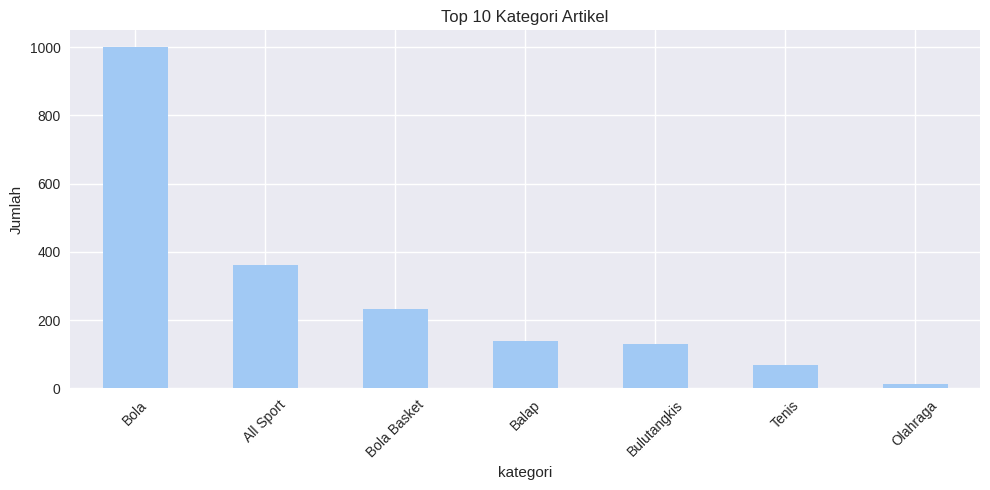

In [40]:
plt.figure(figsize=(10,5))
df_gabungan['kategori'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Kategori Artikel")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

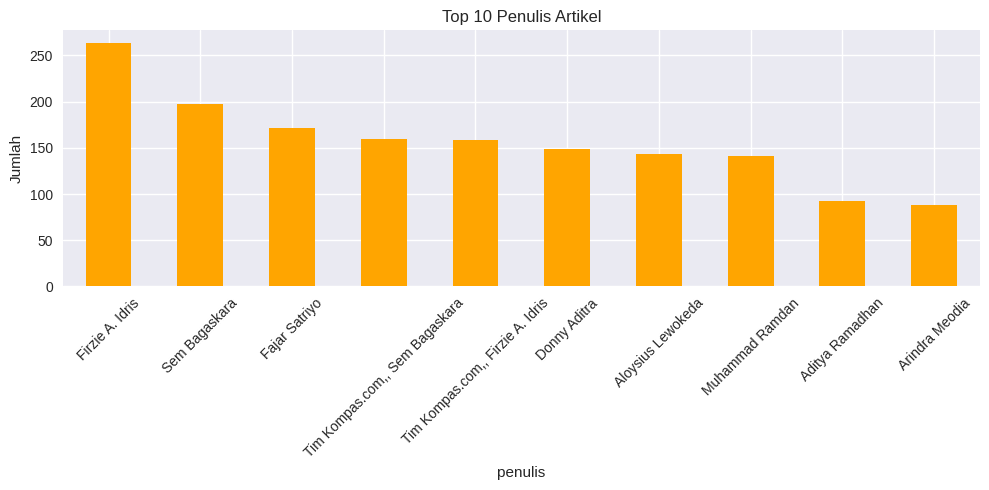

In [41]:
plt.figure(figsize=(10,5))
df_gabungan['penulis'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Penulis Artikel")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
df_gabungan['panjang_konten'] = df_gabungan['konten'].astype(str).apply(len)
df_gabungan[['judul', 'panjang_konten']].head()

,judul,panjang_konten
0,"Man United ke Malaysia Pekan Ini, Laga Lawan A...",1589
1,Kylian Mbappe Raih Sepatu Emas Eropa 2025 Usai...,1899
2,Klasemen Akhir Liga Inggris 2024-2025: Liverpo...,2480
3,Skor Athletic Bilbao Vs Barcelona 0-3: Rekor 1...,1268
4,Klasemen MotoGP 2025 Usai Drama GP Inggris: Ma...,1463


20 Kata Terbanyak: [('indonesia', 3370), ('tim', 3047), ('pemain', 2944), ('liga', 2816), ('laga', 2767), ('poin', 2675), ('pertandingan', 2642), ('musim', 2116), ('kemenangan', 1931), ('juara', 1845), ('baca', 1839), ('gol', 1717), ('pelatih', 1578), ('united', 1562), ('vs', 1501), ('jakarta', 1498), ('persib', 1466), ('menit', 1414), ('hasil', 1395), ('final', 1297)]


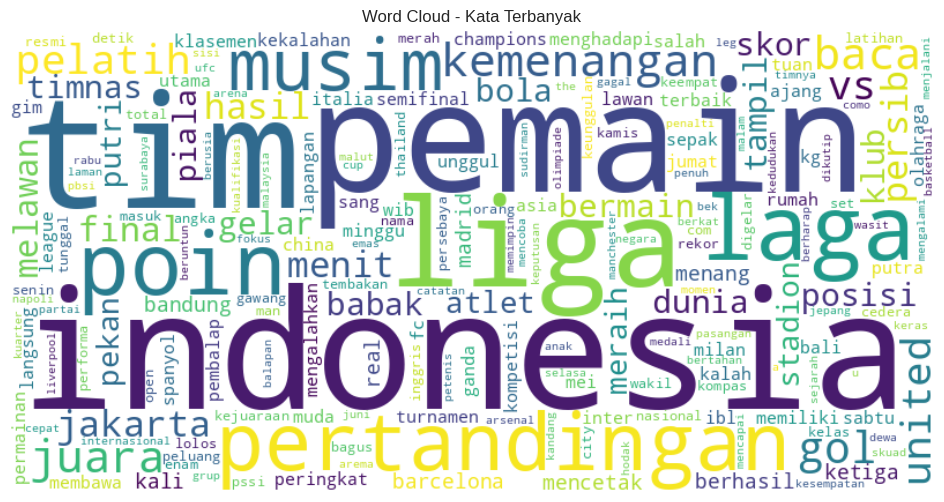

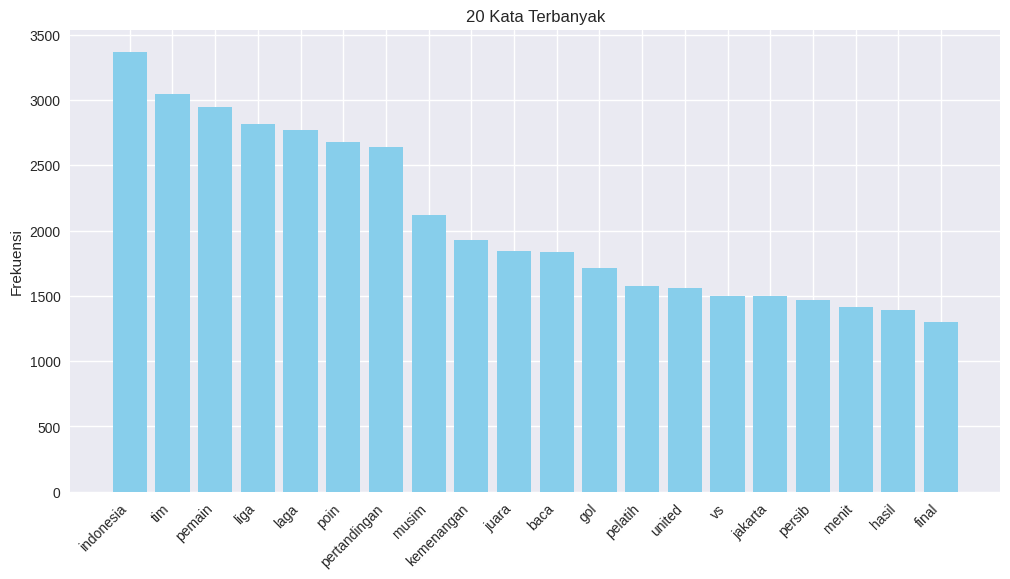

In [43]:
from collections import Counter


# Gabungkan semua teks dari kolom konten jadi satu string besar
all_text = ' '.join(df_gabungan['konten'].dropna().astype(str))

# Bersihkan teks: buat lowercase dan hilangkan karakter non-huruf
clean_text = re.sub(r'[^a-zA-Z\s]', '', all_text).lower()

# Pecah jadi kata-kata
words = clean_text.split()

# Hitung frekuensi kemunculan kata
word_counts = Counter(words)

# Tampilkan 20 kata paling umum
most_common_words = word_counts.most_common(20)
print("20 Kata Terbanyak:", most_common_words)

# WordCloud
wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kata Terbanyak')
plt.show()

# Bar plot untuk 20 kata terbanyak
words_bar = [w[0] for w in most_common_words]
freq_bar = [w[1] for w in most_common_words]

plt.figure(figsize=(12,6))
plt.bar(words_bar, freq_bar, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('20 Kata Terbanyak')
plt.ylabel('Frekuensi')
plt.show()

In [44]:
# Simpan ke JSON
df_gabungan.to_json('data_berita_final.json', orient='records', force_ascii=False, indent=4)

# Simpan ke CSV
df_gabungan.to_csv('data_berita_final.csv', index=False)

In [45]:
df_gabungan

,judul,kategori,tanggal,konten,penulis,gambar,link,sumber,panjang_konten
0,"Man United ke Malaysia Pekan Ini, Laga Lawan A...",Bola,26/05/2025,manchester united berduel melawan asean all st...,Sem Bagaskara,https://asset.kompas.com/crops/y6boYMTAUOxnxTx...,https://bola.kompas.com/read/2025/05/26/080741...,https://www.kompas.com/,1589
1,Kylian Mbappe Raih Sepatu Emas Eropa 2025 Usai...,Bola,26/05/2025,penyerang real madrid kylian mbappe berhasil m...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/8UZCMWN13U7PbVK...,https://bola.kompas.com/read/2025/05/26/072244...,https://www.kompas.com/,1899
2,Klasemen Akhir Liga Inggris 2024-2025: Liverpo...,Bola,26/05/2025,liga inggris musim rampung liverpool mengangka...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/Qx8VC-9OpjxlvdF...,https://bola.kompas.com/read/2025/05/26/065818...,https://www.kompas.com/,2480
3,Skor Athletic Bilbao Vs Barcelona 0-3: Rekor 1...,Bola,26/05/2025,robert lewandowski menyelesaikan musim torehan...,"Tim Kompas.com,, Sem Bagaskara",https://asset.kompas.com/crops/aBEGgcIQwIjqhWO...,https://bola.kompas.com/read/2025/05/26/064535...,https://www.kompas.com/,1268
4,Klasemen MotoGP 2025 Usai Drama GP Inggris: Ma...,Bola,26/05/2025,marc marquez puncak klasemen motogp pebalap sp...,Sem Bagaskara,https://asset.kompas.com/crops/Tg4Em0YbHai3LEJ...,https://www.kompas.com/motogp/read/2025/05/26/...,https://www.kompas.com/,1463
...,...,...,...,...,...,...,...,...,...
1933,Michael Page incar Kamaru dan Colby untuk laga...,All Sport,"Senin, 24 Maret 2025 17:04 WIB",petarung ultimate fighting championship ufc mi...,Aloysius Lewokeda,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4733101/mich...,https://www.antaranews.com,993
1934,Feldani Effendy juara umum kejuaraan downhill ...,Balap,"Senin, 24 Maret 2025 16:51 WIB",pembalap sepeda downhill indonesia feldani eff...,Muhammad Ramdan,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4733057/feld...,https://www.antaranews.com,1532
1935,Anthony Sinisuka Ginting absen di Kejuaraan As...,Bulutangkis,"Senin, 24 Maret 2025 15:42 WIB",hasil pemeriksaan tim medis kondisi ginting di...,Muhammad Ramdan,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4732785/anth...,https://www.antaranews.com,1020
1936,Juara gulat Olimpiade Steveson kalah mengejutk...,All Sport,"Senin, 24 Maret 2025 15:37 WIB",rintangan jalan olahraga gila hidup jakarta ju...,Aloysius Lewokeda,https://img.antaranews.com/cache/1200x800/2025...,https://www.antaranews.com/berita/4732769/juar...,https://www.antaranews.com,1458


In [46]:
df_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938 entries, 0 to 1937
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   judul           1938 non-null   object
 1   kategori        1938 non-null   object
 2   tanggal         1938 non-null   object
 3   konten          1938 non-null   object
 4   penulis         1938 non-null   object
 5   gambar          1938 non-null   object
 6   link            1938 non-null   object
 7   sumber          1938 non-null   object
 8   panjang_konten  1938 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 136.4+ KB


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def search_documents(df, query, top_n=5):  # default ke 5
    documents = (df['judul'] + " " + df['konten']).astype(str).tolist()
    vectorizer = TfidfVectorizer()
    doc_vectors = vectorizer.fit_transform(documents)
    query_vector = vectorizer.transform([query])
    cos_sim = cosine_similarity(query_vector, doc_vectors)[0]
    ranking = sorted(enumerate(cos_sim), key=lambda x: x[1], reverse=True)

    results = []
    for idx, score in ranking[:top_n]:
        results.append({
            'index': idx,
            'score': score,
            'judul': df.iloc[idx]['judul'],
            'konten': df.iloc[idx]['konten']
        })
    return results

# Load dataframe sebelumnya
# df_gabungan = pd.read_csv("data.csv")  # Jika belum di-load

# Input dari user
query_user = input("Masukkan kata kunci pencarian: ")

# Ambil 5 dokumen teratas
hasil = search_documents(df_gabungan, query_user, top_n=5)

# Tampilkan hasil
print("\nHasil pencarian 5 teratas:")
for item in hasil:
    print(f"\nJudul: {item['judul']} (Skor: {item['score']:.4f})")
    print(f"Konten: {item['konten'][:200]}...")  # tampilkan 200 karakter pertama
    print('-' * 80)

Masukkan kata kunci pencarian: juara gulat

Hasil pencarian 5 teratas:

Judul: Juara gulat Olimpiade Steveson kalah mengejutkan di final NCAA (Skor: 0.3402)
Konten: rintangan jalan olahraga gila hidup jakarta juara gulat olimpiade tokyo gable steveson menelan kekalahan mengejutkan wyatt hendrickson final kejuaraan nasional gulat divisi i national collegiate athle...
--------------------------------------------------------------------------------

Judul: Peraih emas gulat Olimpiade Kyle Snyder terjerat kasus prostitusi (Skor: 0.2344)
Konten: peraih medali emas gulat olimpiade rio kyle snyder ditangkap kepolisian kota columbus amerika serikat peristiwa penggerebekan prostitusi kota snyder salah orang didakwa penggerebekan polisi memimpin o...
--------------------------------------------------------------------------------

Judul: Kalahkan Belal, Maddalena rebut gelar juara kelas welter UFC (Skor: 0.0903)
Konten: petarung ultimate fighting championship ufc jack della maddalena merebut gel

In [55]:
# BM25
!pip install rank_bm25

In [56]:
from rank_bm25 import BM25Okapi
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def search_bm25(df, query, top_n=5):
    # Tokenisasi dokumen (judul + konten)
    documents = (df['judul'] + " " + df['konten']).astype(str).tolist()
    tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]

    # Tokenisasi query
    query_tokens = word_tokenize(query.lower())

    # Inisialisasi BM25 dan hitung skor
    bm25 = BM25Okapi(tokenized_docs)
    scores = bm25.get_scores(query_tokens)

    # Ranking skor tertinggi
    ranking = sorted(enumerate(scores), key=lambda x: x[1], reverse=True)

    # Ambil top N hasil
    results = []
    for idx, score in ranking[:top_n]:
        results.append({
            'index': idx,
            'score': score,
            'judul': df.iloc[idx]['judul'],
            'konten': df.iloc[idx]['konten']
        })
    return results

# --- Pemakaian ---
query_user = input("Masukkan kata kunci pencarian: ")
hasil = search_bm25(df_gabungan, query_user, top_n=5)

print("\nHasil pencarian dengan BM25:")
for item in hasil:
    print(f"\nJudul: {item['judul']} (Skor: {item['score']:.4f})")
    print(f"Konten: {item['konten'][:200]}...")
    print('-' * 80)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Masukkan kata kunci pencarian: juara gulat

Hasil pencarian dengan BM25:

Judul: Juara gulat Olimpiade Steveson kalah mengejutkan di final NCAA (Skor: 12.2950)
Konten: rintangan jalan olahraga gila hidup jakarta juara gulat olimpiade tokyo gable steveson menelan kekalahan mengejutkan wyatt hendrickson final kejuaraan nasional gulat divisi i national collegiate athle...
--------------------------------------------------------------------------------

Judul: Peraih emas gulat Olimpiade Kyle Snyder terjerat kasus prostitusi (Skor: 11.2867)
Konten: peraih medali emas gulat olimpiade rio kyle snyder ditangkap kepolisian kota columbus amerika serikat peristiwa penggerebekan prostitusi kota snyder salah orang didakwa penggerebekan polisi memimpin o...
--------------------------------------------------------------------------------

Judul: Kalahkan Belal, Maddalena rebut gelar juara kelas welter UFC (Skor: 6.9830)
Konten: petarung ultimate fighting championship ufc jack della maddalena merebut

In [59]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

class BM25Plus:
    def __init__(self, corpus, k1=1.5, b=0.75, delta=1.0):
        self.corpus = corpus
        self.k1 = k1
        self.b = b
        self.delta = delta
        self.N = len(corpus)
        self.avgdl = np.mean([len(doc) for doc in corpus])
        self.doc_freqs = []
        self.idf = {}
        self.doc_len = []
        self._initialize()

    def _initialize(self):
        df = {}
        for document in self.corpus:
            frequencies = {}
            for word in document:
                frequencies[word] = frequencies.get(word, 0) + 1
            self.doc_freqs.append(frequencies)
            self.doc_len.append(len(document))
            for word in frequencies.keys():
                df[word] = df.get(word, 0) + 1

        for word, freq in df.items():
            self.idf[word] = np.log( (self.N - freq + 0.5) / (freq + 0.5) + 1 )

    def get_score(self, query, index):
        score = 0.0
        doc_freqs = self.doc_freqs[index]
        doc_len = self.doc_len[index]

        for word in query:
            if word not in doc_freqs:
                continue
            freq = doc_freqs[word]
            numerator = self.idf.get(word, 0) * (freq + self.delta)
            denominator = freq + self.delta + self.k1 * (1 - self.b + self.b * doc_len / self.avgdl)
            score += numerator / denominator
        return score

    def get_scores(self, query):
        scores = [self.get_score(query, idx) for idx in range(self.N)]
        return np.array(scores)

def search_documents_bm25plus(df, query, top_n=5):
    # Gabungkan judul dan konten jadi 1 dokumen per baris
    documents = (df['judul'] + " " + df['konten']).astype(str).tolist()

    # Tokenisasi tiap dokumen
    tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]

    # Tokenisasi query
    query_tokens = word_tokenize(query.lower())

    # Inisiasi BM25Plus
    bm25plus = BM25Plus(tokenized_docs)

    # Dapatkan skor BM25+ untuk setiap dokumen
    scores = bm25plus.get_scores(query_tokens)

    # Urutkan berdasarkan skor tertinggi
    ranking = sorted(enumerate(scores), key=lambda x: x[1], reverse=True)

    results = []
    for idx, score in ranking[:top_n]:
        results.append({
            'index': idx,
            'score': score,
            'judul': df.iloc[idx]['judul'],
            'konten': df.iloc[idx]['konten']
        })

    return results

# --- Contoh pemakaian ---
query_user = input("Masukkan kata kunci pencarian: ")
hasil = search_documents_bm25plus(df_gabungan, query_user, top_n=5)

print("\nHasil pencarian BM25+:")
for item in hasil:
    print(f"\nJudul: {item['judul']} (Skor: {item['score']:.4f})")
    print(f"Konten: {item['konten'][:200]}...")
    print('-' * 80)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Masukkan kata kunci pencarian: juara gulat

Hasil pencarian BM25+:

Judul: Juara gulat Olimpiade Steveson kalah mengejutkan di final NCAA (Skor: 5.4537)
Konten: rintangan jalan olahraga gila hidup jakarta juara gulat olimpiade tokyo gable steveson menelan kekalahan mengejutkan wyatt hendrickson final kejuaraan nasional gulat divisi i national collegiate athle...
--------------------------------------------------------------------------------

Judul: Peraih emas gulat Olimpiade Kyle Snyder terjerat kasus prostitusi (Skor: 5.1152)
Konten: peraih medali emas gulat olimpiade rio kyle snyder ditangkap kepolisian kota columbus amerika serikat peristiwa penggerebekan prostitusi kota snyder salah orang didakwa penggerebekan polisi memimpin o...
--------------------------------------------------------------------------------

Judul: Kalahkan Belal, Maddalena rebut gelar juara kelas welter UFC (Skor: 4.1889)
Konten: petarung ultimate fighting championship ufc jack della maddalena merebut gelar j